In [1]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import det
import sys
#q2

In [2]:
#part1-> (A^T A)^-1 A^T Y
x = [[1,2], [2,3], [3,3], [4,5], [5, 5],[1,0],[2,1],[3,1],[3,2],[5,3],[6,5]]
y = [1,1,1,1,1,-1,-1,-1,-1,-1,-1]

In [3]:
def least_squared_approach(x, y):
    r = x.shape[0]
    z = np.zeros((r,1), dtype=np.int64)
    z += 1
    m = np.append(x, z, axis=1)
    A = np.asmatrix(m)
    At = A.transpose()
    inver = inv(np.matmul(At , A) )
    Y = np.asmatrix(y).transpose()
    return np.matmul(np.matmul(inver, At), Y)


In [4]:
x = [[3,3], [3,0], [2,1], [0,2], [-1, 1], [0,0], [-1,-1], [1,0]]
x = np.asarray(x)
y = [1,1,1,1,-1,-1,-1,-1]
y = np.asarray(y)
lsa = least_squared_approach(x,y)

In [5]:
def find_threshhold(mat, class1, class2):
    t1 = -sys.maxint
    t2 = sys.maxint
    mat = np.asarray(mat)[:,0]
    for r1 in class1:
        print r1, mat
        t1=max(t1,-(np.dot(mat,r1)))
    for r2 in class2:
        t2=min(t2,-1*(np.dot(mat,r2)))
    return (t1+t2)/2
    
def fisher_lda(x, y):
    class1 = []
    class2 = []
    for a in zip(x,y):
        if a[1]==1:
            class1.append(a[0])
        else:
            class2.append(a[0])
    mat1 = np.asmatrix(class1)
    mat2 = np.asmatrix(class2)
    u1 = mat1.mean(0)
    u2 = mat2.mean(0)
    reg1 = mat1 - u1
    reg2 = mat2 - u2
    sb2 = np.matmul(reg1.transpose(), reg1) + np.matmul(reg2.transpose(), reg2)
    u = (u1-u2).transpose()
    ans = np.matmul(np.linalg.inv(sb2),u)
    ans /= np.linalg.norm(ans)
    b = find_threshhold(np.asarray(ans), class1, class2)
    print b
    ans =  np.vstack([np.asarray(ans), b])
    return ans

In [6]:
fisher = fisher_lda(x,y)
fisher

[3 3] [ 0.74651327  0.66537052]
[3 0] [ 0.74651327  0.66537052]
[2 1] [ 0.74651327  0.66537052]
[0 2] [ 0.74651327  0.66537052]
-1.03862716059


array([[ 0.74651327],
       [ 0.66537052],
       [-1.03862716]])

In [61]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [62]:
print "q2 1st dataset"
print "fisher"
print fisher
print "lsa"
print lsa

q2 1st dataset
fisher
[[ 0.74651327]
 [ 0.66537052]
 [-1.03862716]]
lsa
[[ 0.375     ]
 [ 0.33423913]
 [-0.57880435]]


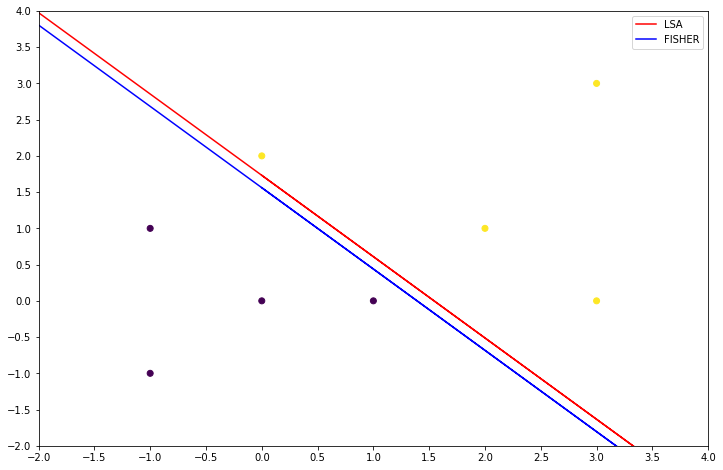

In [63]:
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
#figure = plt.figure()
plt.scatter(x[:,0],x[:,1],c=y[:])
plot_graph(lsa.tolist(),ax, "red", "LSA")
plot_graph(fisher.tolist(), ax, "blue", "FISHER")
plt.xlim(-2, 4)
plt.ylim(-2, 4)
fig.set_size_inches(12, 8)
plt.savefig("q2_a.jpg")
plt.show()


In [64]:
def plot_graph(vect, ax, color,label):
    n = 1000
    if len(vect)<3:
        vect.append(0)
    x = np.linspace(-4, 4, 10000)
    x = np.append(x,0)
    ax.plot(x, -1 * ( vect[0] * x +  vect[2])/vect[1], color=color, label=label)
    plt.legend(loc='best') 

In [10]:
#part 4
x = [[3,3], [3,0], [2,1], [0,1.5], [-1, 1], [0,0], [-1,-1], [1,0]]
x = np.asarray(x)
y = [1,1,1,1,-1,-1,-1,-1]
y = np.asarray(y)
lsa = least_squared_approach(x,y)
fisher = fisher_lda(x,y)
#m = lsa[2]
#fisher_extended = np.vstack([fisher, m])

[ 3.  3.] [ 0.78102704  0.62449721]
[ 3.  0.] [ 0.78102704  0.62449721]
[ 2.  1.] [ 0.78102704  0.62449721]
[ 0.   1.5] [ 0.78102704  0.62449721]
-0.858886428102


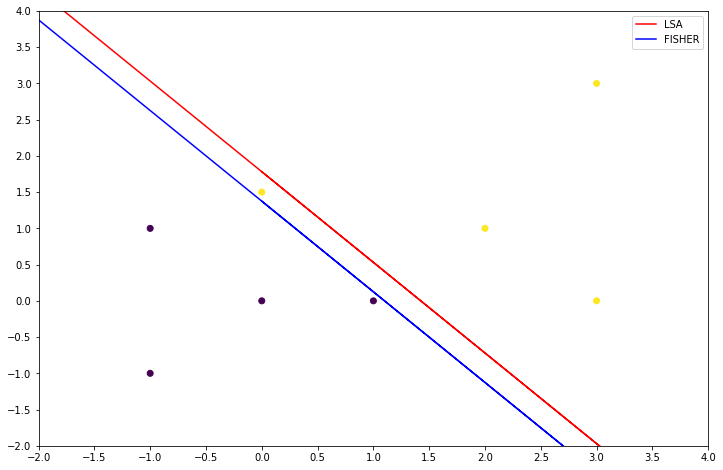

In [66]:
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.scatter(x[:,0],x[:,1],c=y[:])
plt.xlim(-2, 4)
plt.ylim(-2, 4)
plot_graph(lsa.tolist(),ax, "red", "LSA")
plot_graph(fisher.tolist(), ax, "blue", "FISHER")
fig.set_size_inches(12, 8)
plt.savefig("q2_b.jpg")
plt.show()

In [67]:
print "q2 2nd dataset"
print "fisher"
print fisher
print "lsa"
print lsa

q2 2nd dataset
fisher
[[ 0.78102704]
 [ 0.62449721]
 [-0.85888643]]
lsa
[[ 0.37779521]
 [ 0.30207925]
 [-0.53825029]]


In [215]:
x = np.linspace(-10, 10, 10000)
x = np.append(x,0)
vect = fisher
print x, -1 * ( vect[0] * x +  vect[2])/vect[1]
x[10000]

[-10.         -9.9979998  -9.9959996 ...,   9.9979998  10.          0.       ] [[ 13.23170732  13.22946319  13.22721906 ...,  -9.20507295  -9.20731707
    2.01219512]]


0.0

In [11]:
fisher[0]/fisher[1]

array([ 1.25064935])

In [12]:
lsa[0]/lsa[1]

matrix([[ 1.25064935]])